<a href="https://colab.research.google.com/github/Tessellate-Imaging/Monk_Object_Detection/blob/master/application_model_zoo/Example%20-%20Thermal%20Soccer%20-%20(Player%20Detection).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of contents


## 1. Installation Instructions



## 2. Use trained model to detect soccer players



## 3. How to train using MMdetection wrapper and Thermal-Soccer dataset

# Installation

 - Run these commands
     
     - git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git
     
     - cd Monk_Object_Detection/16_mmdet/installation
     
 - Select the right requirements file and run
 
     - chmod +x install.sh && ./install.sh

In [1]:
! git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git


Cloning into 'Monk_Object_Detection'...
remote: Enumerating objects: 384, done.
remote: Counting objects: 100% (384/384), done.
remote: Compressing objects: 100% (319/319), done.
remote: Total 9443 (delta 193), reused 188 (delta 62), pack-reused 9059
Receiving objects: 100% (9443/9443), 243.95 MiB | 13.59 MiB/s, done.
Resolving deltas: 100% (3889/3889), done.
Checking out files: 100% (7628/7628), done.


In [2]:
! cd Monk_Object_Detection/16_mmdet/installation && chmod +x install.sh && ./install.sh
# For Local systems and cloud select the right CUDA version
#! cd Monk_Object_Detection/3_mxrcnn/installation && cat requirements_cuda9.0.txt | xargs -n 1 -L 1 pip install

Streaming output truncated to the last 5000 lines.
  Skipping link: unsupported archive format: .egg: https://files.pythonhosted.org/packages/33/cc/1c6d07211d1b0adb97325174d2007c2a3f09520521f5523c3ea26b633be9/Pillow-5.2.0-py3.5-win32.egg#sha256=f8582e1ab155302ea9ef1235441a0214919f4f79c4c7c21833ce9eec58181781 (from https://pypi.org/simple/pillow/) (requires-python:>=2.7, !=3.0.*, !=3.1.*, !=3.2.*, !=3.3.*)
  Skipping link: unsupported archive format: .egg: https://files.pythonhosted.org/packages/d4/cd/09fbb9a605060364f0030b859749f8c01ad400d0f2a80b81214d4a889bc6/Pillow-5.2.0-py3.6-win-amd64.egg#sha256=791f07fe13937e65285f9ef30664ddf0e10a0230bdb236751fa0ca67725740dd (from https://pypi.org/simple/pillow/) (requires-python:>=2.7, !=3.0.*, !=3.1.*, !=3.2.*, !=3.3.*)
  Skipping link: unsupported archive format: .egg: https://files.pythonhosted.org/packages/2a/e4/7043ddce180775e46bce769df7ee8fa0d88e40274f3ede74a81ca5fd167e/Pillow-5.2.0-py3.6-win32.egg#sha256=ebcfc33a6c34984086451e230253bc33727

In [3]:
! pip install -q kaggle

In [5]:
from google.colab import files

files.upload()#Upload the kaggl.json file here

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kushagraawasthi","key":"af52965e4057ad841033401d02204069"}'}

In [6]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:

! kaggle datasets download -d aalborguniversity/thermal-soccer-dataset

100% 1.60G/1.61G [00:38<00:00, 42.2MB/s]
100% 1.61G/1.61G [00:38<00:00, 45.2MB/s]


In [9]:
! unzip -qq thermal-soccer-dataset.zip

In [10]:
! pip install "git+https://github.com/open-mmlab/cocoapi.git#subdirectory=pycocotools"

  Cloning https://github.com/open-mmlab/cocoapi.git to /tmp/pip-req-build-vc05hs5q
  Running command git clone -q https://github.com/open-mmlab/cocoapi.git /tmp/pip-req-build-vc05hs5q
  Created wheel for mmpycocotools: filename=mmpycocotools-12.0.3-cp36-cp36m-linux_x86_64.whl size=266784 sha256=4ae9b72947bc3221a8d46444cf032c6d490b072698248698d77d1ea32d290bdd
  Stored in directory: /tmp/pip-ephem-wheel-cache-h2d0we6n/wheels/cd/f6/de/018ccc2d175046c612e93b42a169cd1ab7563d61581cfba8df
Successfully built mmpycocotools


In [11]:
! unzip -qq '/content/drive/My Drive/Person_Images.zip'


In [12]:
import os

img_list = sorted(os.listdir("/content/Person_Images"));

In [13]:
lis1 = sorted([str(i) for i in range(1,3001)])

In [14]:
import os,sys
os.mkdir("root")

In [15]:
os.mkdir("root/Person_bbox1")

In [16]:
#Creating seperate directory for images and the xml files.

In [17]:
import shutil
shutil.copytree('/content/Person_Images','/content/root/Persons1')


'/content/root/Persons1'

In [18]:
shutil.copyfile('/content/Public dataset/GT-1.xml','/content/root/Person_bbox1/1.xml')
shutil.copyfile('/content/Public dataset/GT-2.xml','/content/root/Person_bbox1/2.xml')
shutil.copyfile('/content/Public dataset/GT-3.xml','/content/root/Person_bbox1/3.xml')
shutil.copyfile('/content/Public dataset/GT-4.xml','/content/root/Person_bbox1/4.xml')

'/content/root/Person_bbox1/4.xml'

In [19]:
! pip install xmltodict tqdm dicttoxml


  Created wheel for dicttoxml: filename=dicttoxml-1.7.4-cp36-none-any.whl size=17453 sha256=e3d73c0fdfc4e8bac46580e946155af6c09f61d970be5f6725a2289d5291be50
  Stored in directory: /root/.cache/pip/wheels/62/4f/a3/afd4a68f5add45a668c14efa53b64d5cffb2be6bacf993c151
Successfully built dicttoxml


# Use already trained model

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/16_mmdet/lib")

In [2]:

from infer_engine import Infer

In [3]:
gtf = Infer();

In [4]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1-ensvWMUPGfvQOwJuKsD4eI8BlS__xoR' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1-ensvWMUPGfvQOwJuKsD4eI8BlS__xoR" -O obj_thermal_soccer_trained.zip && rm -rf /tmp/cookies.txt

--2020-09-24 13:06:42--  https://docs.google.com/uc?export=download&id=1-ensvWMUPGfvQOwJuKsD4eI8BlS__xoR
Resolving docs.google.com (docs.google.com)... 108.177.96.102, 108.177.96.100, 108.177.96.138, ...
Connecting to docs.google.com (docs.google.com)|108.177.96.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘STDOUT’

-                       [ <=>                ]   3.19K  --.-KB/s    in 0s      

2020-09-24 13:06:42 (59.3 MB/s) - written to stdout [3265]

--2020-09-24 13:06:42--  https://docs.google.com/uc?export=download&confirm=GoZQ&id=1-ensvWMUPGfvQOwJuKsD4eI8BlS__xoR
Resolving docs.google.com (docs.google.com)... 108.177.96.113, 108.177.96.102, 108.177.96.100, ...
Connecting to docs.google.com (docs.google.com)|108.177.96.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-1c-docs.googleusercontent.com/docs/securesc/fkbut4ovc324gjigbbob44o0i60s6du3/46gscfl497

In [5]:
! unzip -qq obj_thermal_soccer_trained.zip

In [6]:
gtf.Model_Params("/content/Thermal-Soccer/work_dirs/config_updated/config_updated.py", 
                 "/content/Thermal-Soccer/work_dirs/config_updated/latest.pth")

Inference Time: 0.536046028137207 sec
Saving Time: 0.047145843505859375 sec


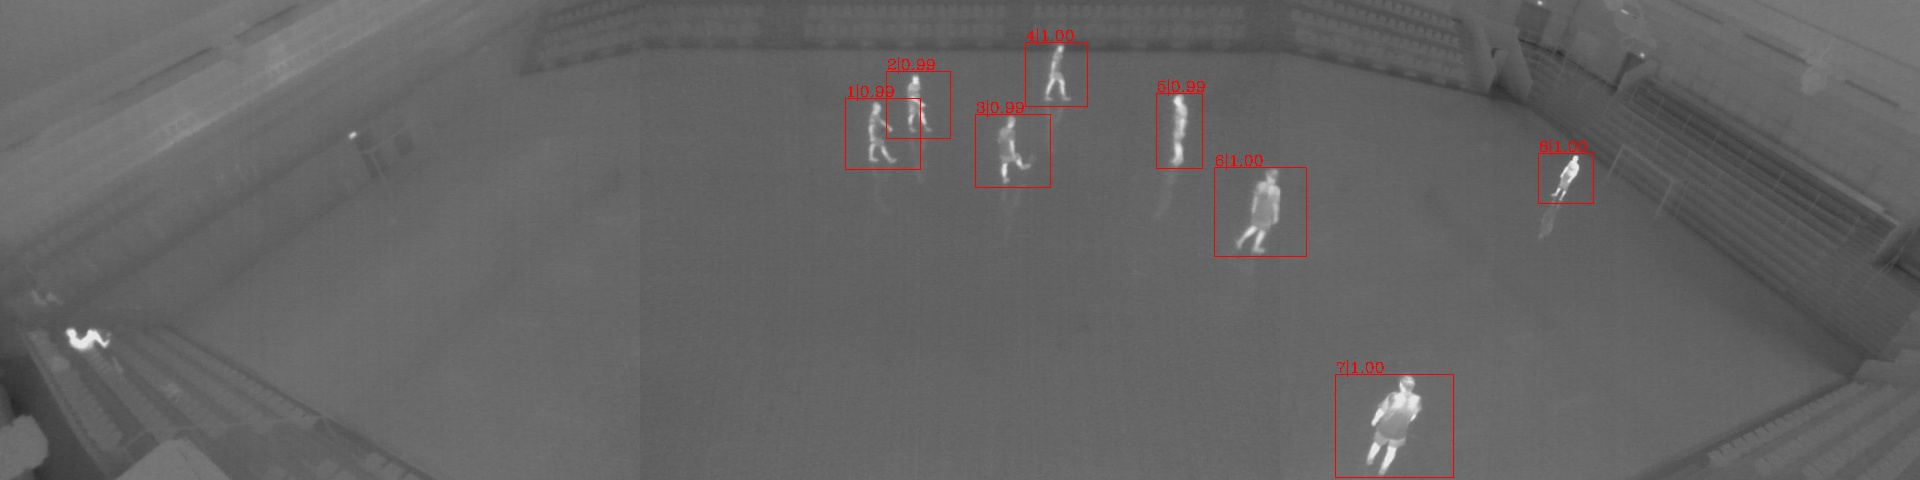

In [7]:
result = gtf.Predict(img_path="/content/Thermal-Soccer/test_images/img1.png",
           out_img_path="result.jpg",
           thresh=0.8);

from IPython.display import Image
Image(filename='result.jpg', width=1920, height=480)

Inference Time: 0.0622401237487793 sec
Saving Time: 0.02858281135559082 sec


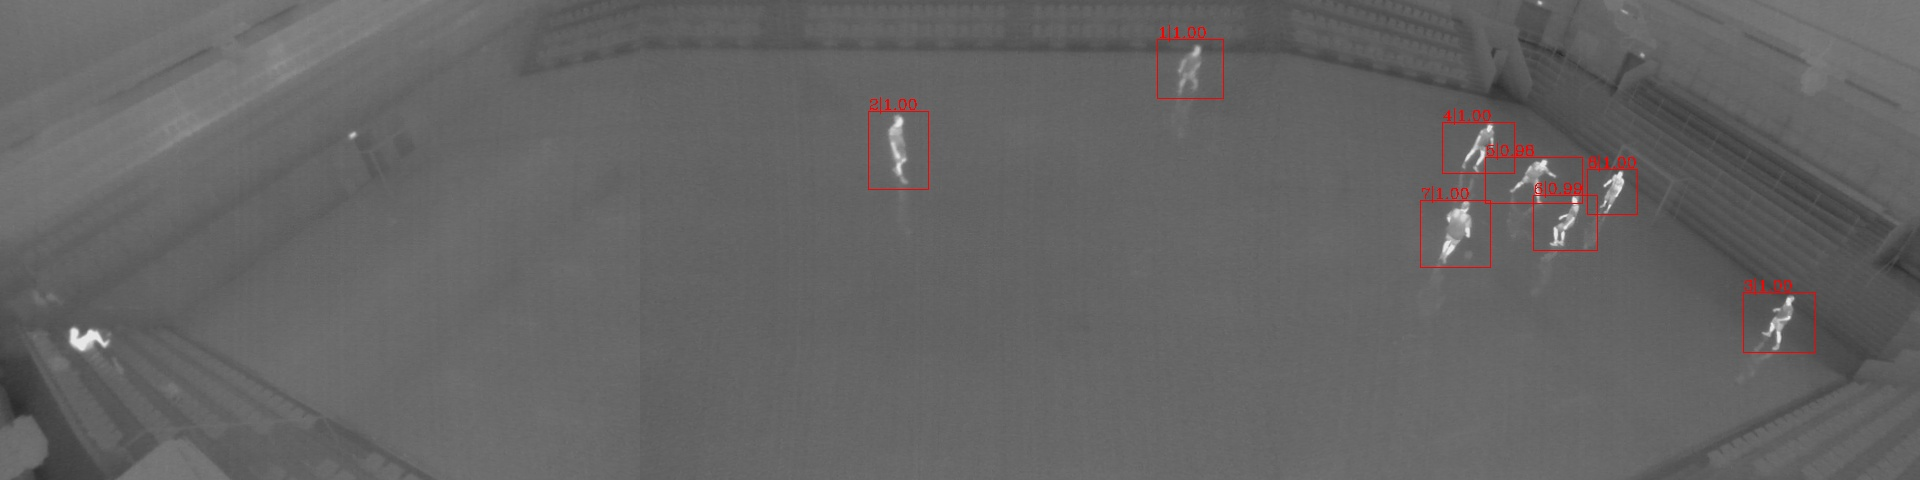

In [8]:
result = gtf.Predict(img_path="/content/Thermal-Soccer/test_images/img2.png",
           out_img_path="result.jpg",
           thresh=0.8);

from IPython.display import Image
Image(filename='result.jpg', width=1920, height=480)

Inference Time: 0.06404280662536621 sec
Saving Time: 0.02826857566833496 sec


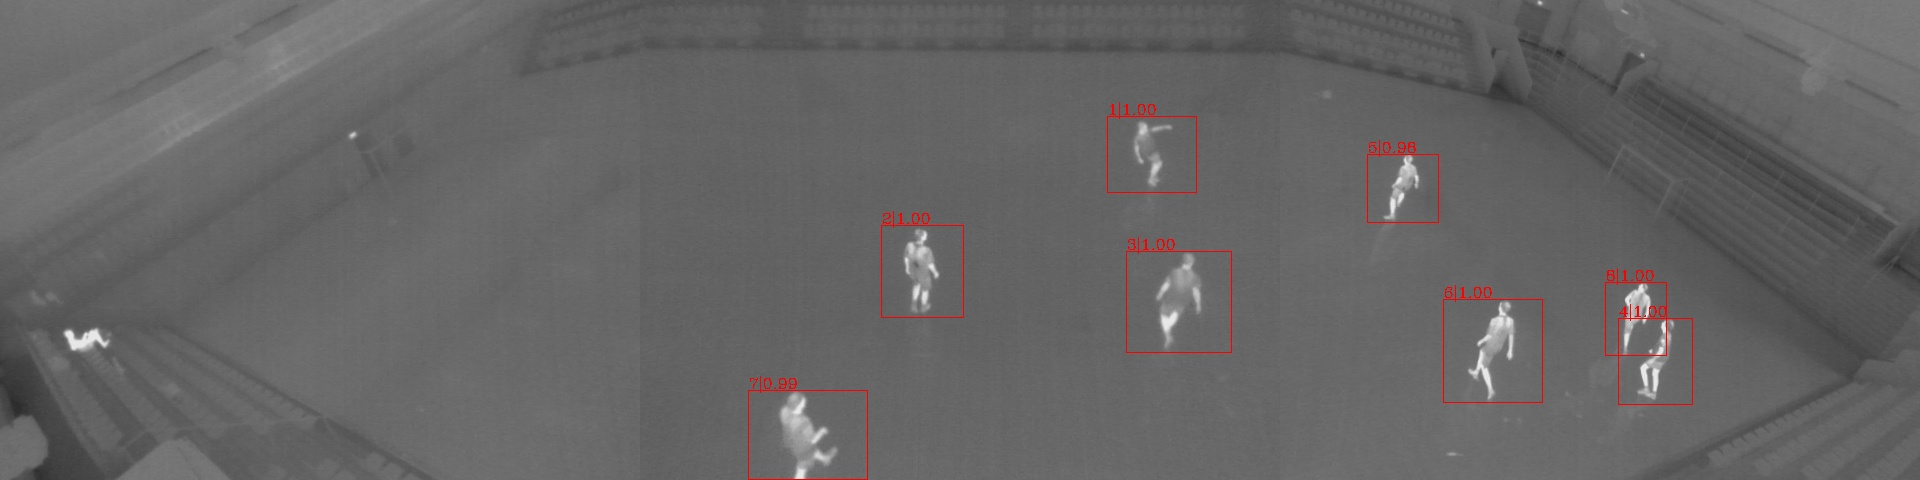

In [9]:
result = gtf.Predict(img_path="/content/Thermal-Soccer/test_images/img3.png",
           out_img_path="result.jpg",
           thresh=0.8);

from IPython.display import Image
Image(filename='result.jpg', width=1920, height=480)

Inference Time: 0.0655202865600586 sec
Saving Time: 0.028470993041992188 sec


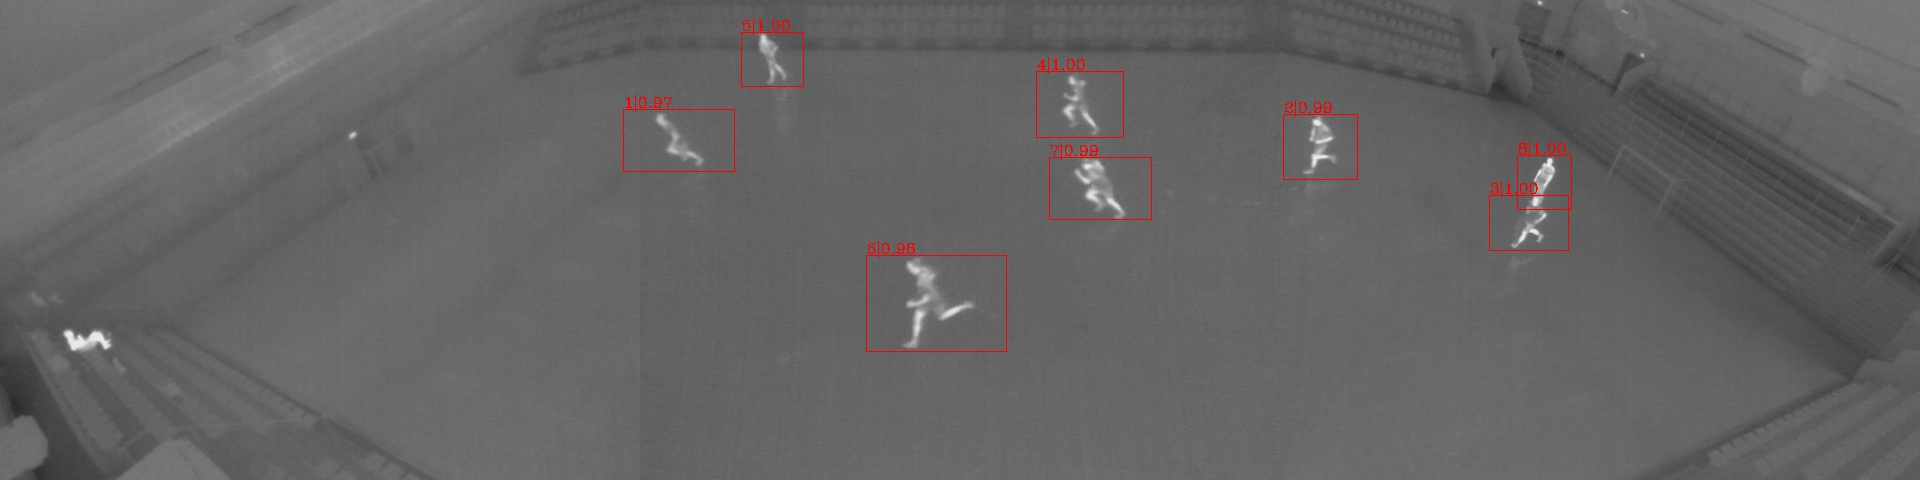

In [10]:
result = gtf.Predict(img_path="/content/Thermal-Soccer/test_images/img4.png",
           out_img_path="result.jpg",
           thresh=0.8);

from IPython.display import Image
Image(filename='result.jpg', width=1920, height=480)

#Training your own detector

## Dataset



- https://www.kaggle.com/aalborguniversity/thermal-soccer-dataset

#VOC to MONK TYPE

## Steps to prepare proper VOC type dataset

  - Download the dataset on to your system from the link given above. 
  - Move all the images in different folders to a common folder.
  - Select all images and rename the first image as **' img '** .
  - Upload this image folder onto your drive and mount your drive in the notebook.
  - Now the xml files are downloaded from kaggle and we will create seperate xml file for each image and save them in a seperate folder.
  - The above steps are performed so that proper label matching can be achieved after the dataset is coverted from VOC to MONK type. 

In [ ]:
fname=[]

In [ ]:
os.mkdir('root/Persons')

In [ ]:
os.mkdir("root/Person_bbox")

In [ ]:
# Saving images in image directory in root

In [ ]:
import cv2
import numpy as np

from tqdm.notebook import tqdm

img_list  = sorted(os.listdir('/content/root/Persons1'))
for i in tqdm(range(len(img_list))):
    img_path = "/content/root/Persons1/"+img_list[i];
    img = cv2.imread(img_path);
    cv2.imwrite("/content/root/Persons/"+lis1[i]+'.png',img);
    fname.append(lis1[i]+'.png')


'\nimg_list2  = sorted(os.listdir(\'/content/root/Persons2\'))    \nfor i in tqdm(range(len(img_list2))):\n    img_path = "/content/root/Persons2/"+img_list2[i];\n    img = cv2.imread(img_path);\n    cv2.imwrite("/content/root/Persons/"+str(int(lis1[i])+750)+\'.png\',img);\n    fname.append(str(int(lis1[i])+750)+\'.png\')\n\nimg_list2  = sorted(os.listdir(\'/content/Public dataset/Images/3\'))    \nfor i in tqdm(range(len(img_list2))):\n    img_path = "/content/Public dataset/Images/3/"+img_list2[i];\n    img = cv2.imread(img_path);\n    cv2.imwrite("/content/root/Persons/img"+img_list2[i].split(\'.\')[0]+\'.jpg\' ,img);\n    fname.append("img"+img_list2[i].split(\'.\')[0]+\'.jpg\')\nimg_list3  = sorted(os.listdir(\'/content/Public dataset/Images/4\'))    \nfor i in tqdm(range(len(img_list3))):\n    img_path = "/content/Public dataset/Images/4/"+img_list3[i];\n    img = cv2.imread(img_path);\n    cv2.imwrite("/content/root/Persons/img"+img_list3[i].split(\'.\')[0]+\'.jpg\' ,img);\n    

In [ ]:
#Creating seperate xml files for each image and saving them in seperate directory in root

In [ ]:
#imports
import os
import sys
import numpy as np
import pandas as pd
import xmltodict
import json
#import untangle
from tqdm.notebook import tqdm
from pycocotools.coco import COCO
root_dir = "root";
img_dir = "Persons/";
anno_dir = "Person_bbox1/";
files = sorted(os.listdir(root_dir +"/"+ anno_dir));

In [ ]:
annoFile = root_dir + "/" + anno_dir + files[0];
f = open(annoFile, 'r');
my_xml = f.read();

In [ ]:
anno = dict(dict(xmltodict.parse(my_xml))['GT'])

In [ ]:
from dicttoxml import dicttoxml 
from xml.dom.minidom import parseString 
for i in range(0,len(anno['frame'])):  
 dict1  = dict(anno['frame'][i])  
# Variable name of Dictionary is data 
 xml = dicttoxml(dict1,attr_type=False)
 xml_decode = xml.decode() 
  
 xmlfile = open("/content/root/Person_bbox/"+str(i+1)+".xml", "w") 
 xmlfile.write(xml_decode) 
 xmlfile.close()

In [ ]:
#imports
import os
import sys
import numpy as np
import pandas as pd
import xmltodict
import json
#import untangle
from tqdm.notebook import tqdm
from pycocotools.coco import COCO
root_dir = "root";
img_dir = "Persons";
anno_dir = "Person_bbox1/";
files = sorted(os.listdir(root_dir +"/"+ anno_dir));

In [ ]:
annoFile1 = root_dir + "/" + anno_dir + files[1];
f = open(annoFile1, 'r');
my_xml1 = f.read();
anno1 =dict(dict(xmltodict.parse(my_xml1))['GT'])

In [ ]:
from dicttoxml import dicttoxml 
from xml.dom.minidom import parseString 
for i in tqdm(range(0,len(anno1['frame']))):  
 dict1  = dict(anno1['frame'][i])  
# Variable name of Dictionary is data 
 xml = dicttoxml(dict1,attr_type=False)
 xml_decode = xml.decode() 
  
 xmlfile = open("/content/root/Person_bbox/"+str(i+751)+".xml", "w") 
 xmlfile.write(xml_decode) 
 xmlfile.close()

In [ ]:
#imports
import os
import sys
import numpy as np
import pandas as pd
import xmltodict
import json
#import untangle
from tqdm.notebook import tqdm
from pycocotools.coco import COCO
root_dir = "root";
img_dir = "Persons";
anno_dir = "Person_bbox1/";
files = sorted(os.listdir(root_dir +"/"+ anno_dir));
annoFile1 = root_dir + "/" + anno_dir + files[2];
f = open(annoFile1, 'r');
my_xml1 = f.read();
anno1 =dict(dict(xmltodict.parse(my_xml1))['GT'])

In [ ]:
from dicttoxml import dicttoxml 
from xml.dom.minidom import parseString 
for i in tqdm(range(0,len(anno1['frame']))):  
 dict1  = dict(anno1['frame'][i])  
# Variable name of Dictionary is data 
 xml = dicttoxml(dict1,attr_type=False)
 xml_decode = xml.decode() 
  
 xmlfile = open("/content/root/Person_bbox/"+str(i+1501)+".xml", "w") 
 xmlfile.write(xml_decode) 
 xmlfile.close()

In [ ]:
#imports
import os
import sys
import numpy as np
import pandas as pd
import xmltodict
import json
#import untangle
from tqdm.notebook import tqdm
from pycocotools.coco import COCO
root_dir = "root";
img_dir = "Persons";
anno_dir = "Person_bbox1/";
files = sorted(os.listdir(root_dir +"/"+ anno_dir));
annoFile1 = root_dir + "/" + anno_dir + files[3];
f = open(annoFile1, 'r');
my_xml1 = f.read();
anno1 =dict(dict(xmltodict.parse(my_xml1))['GT'])

In [ ]:
from dicttoxml import dicttoxml 
from xml.dom.minidom import parseString 
for i in tqdm(range(0,len(anno1['frame']))):  
 dict1  = dict(anno1['frame'][i])  
# Variable name of Dictionary is data 
 xml = dicttoxml(dict1,attr_type=False)
 xml_decode = xml.decode() 
  
 xmlfile = open("/content/root/Person_bbox/"+str(i+2251)+".xml", "w") 
 xmlfile.write(xml_decode) 
 xmlfile.close()

In [ ]:
# VOC to MONK

In [ ]:
#imports
import os
import sys
import numpy as np
import pandas as pd
import xmltodict
import json
#import untangle
from tqdm.notebook import tqdm
from pycocotools.coco import COCO
root_dir = "root";
img_dir = "Persons/";
anno_dir = "Person_bbox/";
files = sorted(os.listdir(root_dir +"/"+ anno_dir));
#conversion
combined = [];
frame = [];
label_str ="";
for q in tqdm(range(0,len(files))):
   annoFile = root_dir + "/" + anno_dir + files[q];
   f = open(annoFile, 'r');
   my_xml = f.read();

   anno = dict(dict(xmltodict.parse(my_xml)))
   frame=fname[q]
   label_str=""
   for j in range(0,len(anno['root']['object']['item'])):
    obj =  anno['root']['object']['item'][j]['box']
    

   
    
    h = int(obj['key'][0]['#text'])
    w = int(obj['key'][1]['#text'])

    xmax=  int(obj['key'][2]['#text'])+w
    ymax = int(obj['key'][3]['#text'])+h
    
    #xmin= xmax-w
    xmin = int(obj['key'][2]['#text'])-w
    ymin = int(obj['key'][3]['#text'])-h
    #ymin= ymax-h
    label = str(j+1)
    if(j == 7):    
      label_str += str(xmin) + " " +str(ymin) + " " + str(xmax) + " " +str(ymax) + " " + label;
    else:
      label_str += str(xmin) + " " +str(ymin) + " " + str(xmax) + " " +str(ymax) + " " + label+" ";

    
   combined.append([frame, label_str])
df = pd.DataFrame(combined, columns = ['ID', 'Label']);
#df = df.sort_values(by='ID',ignore_index=False)
df.to_csv(root_dir + "/train_labels.csv", index=False);
    

In [ ]:
df1 = pd.read_csv("/content/root/train_labels.csv")

In [ ]:
df1

,ID,Label
0,1.png,844 97 910 247 1 888 72 948 198 2 975 113 1045...
1,10.png,856 97 922 245 1 894 72 954 202 2 980 111 1054...
2,100.png,972 97 1038 219 1 938 125 1034 261 2 993 130 1...
3,1000.png,1251 41 1313 175 1 896 110 956 264 2 1725 275 ...
4,1001.png,1254 40 1310 172 1 897 111 953 263 2 1723 276 ...
...,...,...
2995,995.png,1253 41 1315 165 1 895 111 955 253 2 1727 275 ...
2996,996.png,1253 44 1315 166 1 896 110 956 262 2 1724 275 ...
2997,997.png,1252 42 1316 166 1 893 109 957 257 2 1728 275 ...
2998,998.png,1251 42 1313 164 1 893 110 957 260 2 1728 274 ...


## MONK to COCO TYPE

In [ ]:
import os
import numpy as np 
import cv2
import dicttoxml
import xml.etree.ElementTree as ET
from xml.dom.minidom import parseString
from tqdm import tqdm
import shutil
import json
import pandas as pd

root = "root/";
img_dir = "Persons/";
anno_file = "train_labels.csv";

dataset_path = root;
images_folder = root + "/" + img_dir;
annotations_path = root + "/annotations/";

if not os.path.isdir(annotations_path):
    os.mkdir(annotations_path)
    
input_images_folder = images_folder;
input_annotations_path = root + "/" + anno_file;

output_dataset_path = root;
output_image_folder = input_images_folder;
output_annotation_folder = annotations_path;

tmp = img_dir.replace("/", "");
output_annotation_file = output_annotation_folder + "/instances_" + tmp + ".json";
output_classes_file = output_annotation_folder + "/classes.txt";

if not os.path.isdir(output_annotation_folder):
    os.mkdir(output_annotation_folder);
    
df = pd.read_csv(input_annotations_path);
columns = df.columns

delimiter = " ";

list_dict = [];
anno = [];
for i in range(len(df)):
    img_name = df[columns[0]][i];
    labels = df[columns[1]][i];
    tmp = labels.split(delimiter);
    for j in range(len(tmp)//5):
        label = tmp[j*5+4];
        if(label not in anno):
            anno.append(label);
    anno = sorted(anno)
print(anno)
    
for i in tqdm(range(len(anno))):
    tmp = {};
    tmp["supercategory"] = "master";
    tmp["id"] = i;
    tmp["name"] = anno[i];
    list_dict.append(tmp);

anno_f = open(output_classes_file, 'w');
for i in range(len(anno)):
    anno_f.write(anno[i] + "\n");
anno_f.close();

coco_data = {};
coco_data["type"] = "instances";
coco_data["images"] = [];
coco_data["annotations"] = [];
coco_data["categories"] = list_dict;
image_id = 0;
annotation_id = 0;


for i in tqdm(range(len(df))):
    img_name = df[columns[0]][i];
    labels = df[columns[1]][i];
    tmp = labels.split(delimiter);
    image_in_path = input_images_folder + "/" + img_name;
    img = cv2.imread(image_in_path, 1);
    h, w, c = img.shape;

    images_tmp = {};
    images_tmp["file_name"] = img_name;
    images_tmp["height"] = h;
    images_tmp["width"] = w;
    images_tmp["id"] = image_id;
    coco_data["images"].append(images_tmp);
    

    for j in range(len(tmp)//5):
        x1 = int(tmp[j*5+0]);
        y1 = int(tmp[j*5+1]);
        x2 = int(tmp[j*5+2]);
        y2 = int(tmp[j*5+3]);
        label = tmp[j*5+4];
        annotations_tmp = {};
        annotations_tmp["id"] = annotation_id;
        annotation_id += 1;
        annotations_tmp["image_id"] = image_id;
        annotations_tmp["segmentation"] = [];
        annotations_tmp["ignore"] = 0;
        annotations_tmp["area"] = (x2-x1)*(y2-y1);
        annotations_tmp["iscrowd"] = 0;
        annotations_tmp["bbox"] = [x1, y1, x2-x1, ((y2-y1)/2)];
        annotations_tmp["category_id"] = anno.index(label);

        coco_data["annotations"].append(annotations_tmp)
    image_id += 1;

outfile =  open(output_annotation_file, 'w');
json_str = json.dumps(coco_data, indent=4);
outfile.write(json_str);
outfile.close();

  0%|          | 6/3000 [00:00<00:53, 55.98it/s]

['1', '2', '3', '4', '5', '6', '7', '8']


100%|██████████| 3000/3000 [00:54<00:00, 54.80it/s]


# **Training**

In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/16_mmdet/lib")

In [ ]:
from train_engine import Detector

In [ ]:
gtf = Detector();



In [ ]:
img_dir = "/content/root/Persons/";
annofile = "/content/root/annotations/instances_Persons.json"
class_file = "/content/root/annotations/classes.txt"

gtf.Train_Dataset(img_dir, annofile, class_file);

In [ ]:
gtf.Dataset_Params(batch_size=1, num_workers=4)

In [ ]:

gtf.List_Models();

1. Model - faster_rcnn_fpn50
2. Model - faster_rcnn_fpn101
3. Model - faster_rcnn_x101_32x4d_fpn
4. Model - faster_rcnn_x101_64x4d_fpn
5. Model - cascade_rcnn_fpn50
6. Model - cascade_rcnn_fpn101
7. Model - cascade_rcnn_x101_32x4d_fpn
8. Model - cascade_rcnn_x101_64x4d_fpn
9. Model - retinanet_r50_fpn
10. Model - retinanet_r101_fpn
11. Model - retinanet_x101_32x4d_fpn
12. Model - retinanet_x101_64x4d_fpn
13. Model - retinanet_ghm_r50_fpn
14. Model - retinanet_ghm_r101_fpn
15. Model - retinanet_ghm_x101_32x4d_fpn
16. Model - retinanet_ghm_x101_64x4d_fpn
17. Model - dh_faster_rcnn_fpn50
18. Model - libra_faster_rcnn_fpn50
19. Model - libra_faster_rcnn_fpn101
20. Model - libra_faster_rcnn_x101_64x4d_fpn
21. Model - libra_retinanet_r50_fpn
22. Model - ga_faster_rcnn_x101_32x4d_fpn
23. Model - ga_faster_rcnn_x101_64x4d_fpn
24. Model - ga_retinanet_x101_32x4d_fpn
25. Model - ga_retinanet_x101_64x4d_fpn
26. Model - fovea_r50_fpn_4x4
27. Model - fovea_r101_fpn_4x4
28. Model - fovea_align_r50_f

In [ ]:
gtf.Model_Params(model_name="faster_rcnn_fpn50");

In [ ]:
gtf.Hyper_Params(lr=0.001, momentum=0.9, weight_decay=0.0001);

In [ ]:
gtf.Training_Params(num_epochs=5, val_interval=1);


In [ ]:
gtf.Train();

2020-09-17 16:04:41,749 - mmdet - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.6.9 (default, Jul 17 2020, 12:50:27) [GCC 8.4.0]
CUDA available: True
CUDA_HOME: /usr/local/cuda
NVCC: Cuda compilation tools, release 10.1, V10.1.243
GPU 0: Tesla V100-SXM2-16GB
GCC: gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
PyTorch: 1.4.0
PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - Intel(R) Math Kernel Library Version 2019.0.4 Product Build 20190411 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v0.21.1 (Git Hash 7d2fd500bc78936d1d648ca713b901012f470dbc)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - NNPACK is enabled
  - CUDA Runtime 10.1
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_61,code=sm_61;-gencode;arch=compute_70,code=sm_70;-gencode;arch=compute_75,code=sm_75;-gencode;arch=compute_37,code

2020-09-17 16:04:43,730 - mmdet - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias



loading annotations into memory...
Done (t=0.17s)
creating index...
index created!


2020-09-17 16:04:54,808 - mmdet - INFO - load checkpoint from https://open-mmlab.s3.ap-northeast-2.amazonaws.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
Downloading: "https://open-mmlab.s3.ap-northeast-2.amazonaws.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth" to /root/.cache/torch/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


2020-09-17 16:04:59,342 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([9, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([9]).
size mismatch for roi_head.bbox_head.fc_reg.weight: copying a param with shape torch.Size([320, 1024]) from checkpoint, the shape in current model is torch.Size([32, 1024]).
size mismatch for roi_head.bbox_head.fc_reg.bias: copying a param with shape torch.Size([320]) from checkpoint, the shape in current model is torch.Size([32]).
2020-09-17 16:04:59,349 - mmdet - INFO - Start running, host: root@a830a40e54ae, work_dir: /content/work_dirs/config_updated
2020-09-17 16:04:59,350 - mmdet - INFO - workflow: [('train', 1)], max: 5 epochs


2020-09-17 16:05:07,078 - mmdet - INFO - Epoch [1][50/3000]	lr: 9.890e-05, eta: 0:38:29, time: 0.154, data_time: 0.051, memory: 1222, loss_rpn_cls: 0.0782, loss_rpn_bbox: 0.0802, loss_cls: 1.7140, acc: 53.4219, loss_bbox: 0.5951, loss: 2.4675
2020-09-17 16:05:11,716 - mmdet - INFO - Epoch [1][100/3000]	lr: 1.988e-04, eta: 0:30:40, time: 0.093, data_time: 0.003, memory: 1222, loss_rpn_cls: 0.0200, loss_rpn_bbox: 0.0483, loss_cls: 0.9382, acc: 75.7812, loss_bbox: 0.9128, loss: 1.9192
2020-09-17 16:05:16,269 - mmdet - INFO - Epoch [1][150/3000]	lr: 2.987e-04, eta: 0:27:53, time: 0.091, data_time: 0.003, memory: 1222, loss_rpn_cls: 0.0145, loss_rpn_bbox: 0.0369, loss_cls: 0.8311, acc: 75.0078, loss_bbox: 0.9125, loss: 1.7949
2020-09-17 16:05:20,780 - mmdet - INFO - Epoch [1][200/3000]	lr: 3.986e-04, eta: 0:26:24, time: 0.090, data_time: 0.003, memory: 1222, loss_rpn_cls: 0.0076, loss_rpn_bbox: 0.0332, loss_cls: 0.7455, acc: 75.4180, loss_bbox: 0.8414, loss: 1.6276
2020-09-17 16:05:25,681 -

# Running Inference on Images

In [ ]:
 import os
import sys
sys.path.append("Monk_Object_Detection/16_mmdet/lib")

In [ ]:

from infer_engine import Infer

In [ ]:

gtf = Infer();

In [ ]:
gtf.Model_Params("work_dirs/config_updated/config_updated.py", 
                 "work_dirs/config_updated/latest.pth")

In [ ]:

result = gtf.Predict(img_path="/content/Public dataset/Images/3/4-14-20-1-20-430.png",
           out_img_path="result.jpg",

           thresh=0.9);

Inference Time: 0.07443094253540039 sec
Saving Time: 0.0307769775390625 sec


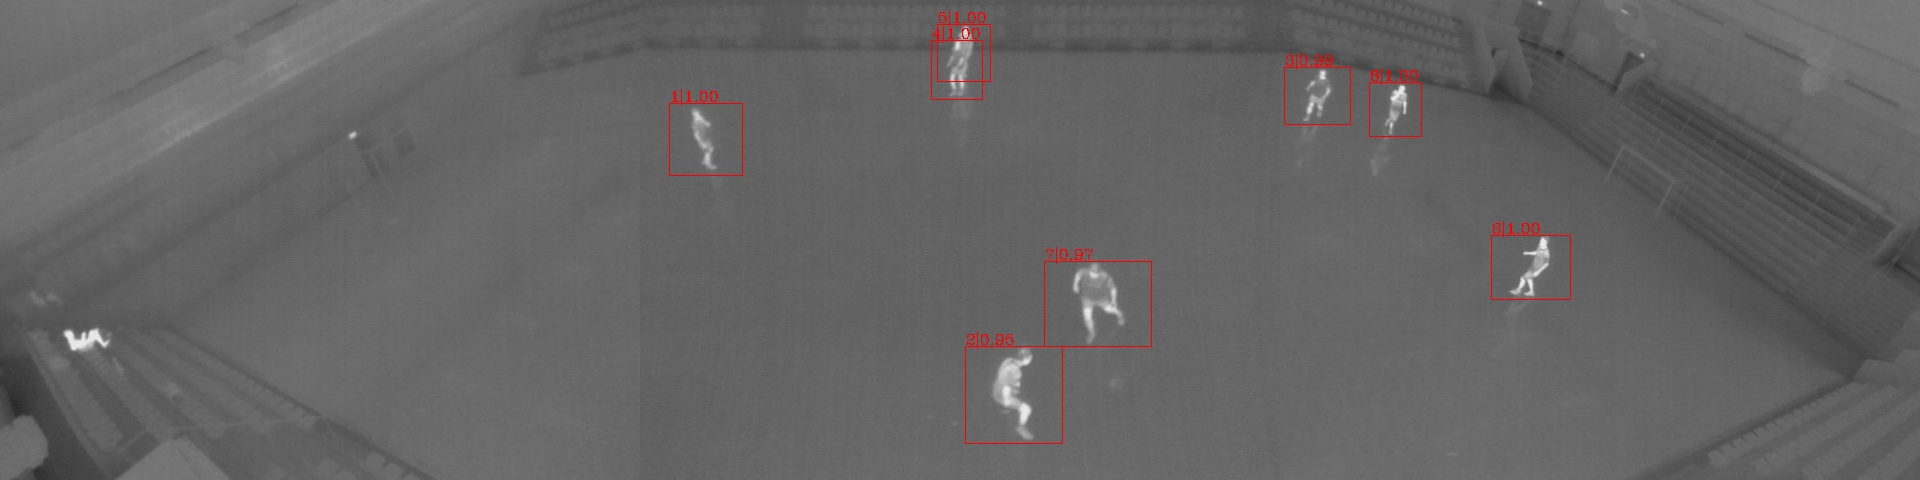

In [ ]:
from IPython.display import Image
Image(filename='result.jpg',width=960,height=480)